In [1]:
import random
import pandas as pd
from datetime import timedelta, date, datetime

# Define lists of employee names and roles
employee_names = ["John Doe", "Jane Smith", "Bob Johnson", "Emily Davis", "Tom Wilson",
                  "Sara Brown", "Mike Lee", "Kim White", "Dave Jones", "Amy Taylor",
                  "Steve Parker", "Lisa Green", "Chris Wright", "Megan Anderson", "Alex Kim",
                  "Karen Lee", "Tim Davis", "Rachel Chen", "David Brown", "Michelle Johnson"]
employee_roles = ["Developer", "Designer", "Product Manager", "Sales Executive", "Marketing Specialist"]

# Define the date range to generate data for
start_date = date(2023, 1, 1)
end_date = date(2023, 3, 31)
delta = end_date - start_date

# Define the dataset as a list of dictionaries
dataset = []
for i in range(20):
    employee_id = i + 1
    employee_name = random.choice(employee_names)
    employee_role = random.choice(employee_roles)
    for j in range(delta.days + 1):
        current_date = start_date + timedelta(days=j)
        active_start_time = "{:02d}:{:02d}".format(random.randint(8, 9), random.randint(0, 59))
        active_screen_time = round(random.uniform(1, 6), 2)
        active_collaboration_time = round(random.uniform(1, 2), 2)
        social_time = round(random.uniform(0, 2), 2)
        total_active_time = active_screen_time + active_collaboration_time + social_time
        if total_active_time < 4:
            active_screen_time += (4 - total_active_time)
        elif total_active_time > 10:
            active_screen_time -= (total_active_time - 10)
        percentage_task_closed = random.randint(60, 100)
        rating = random.randint(1, 4)
        data = {
            "Employee ID": employee_id,
            "Employee Name": employee_name,
            "Date": current_date.strftime("%Y-%m-%d"),
            "Active Start Time": active_start_time,
            "Active Screen Time": active_screen_time,
            "Active Collaboration Time": active_collaboration_time,
            "Social Time": social_time,
            "Percentage of Task Closed": percentage_task_closed,
            "Role": employee_role,
            "Rating": rating
        }
        dataset.append(data)

In [2]:
df = pd.DataFrame(dataset)
df.head(5)

,Employee ID,Employee Name,Date,Active Start Time,Active Screen Time,Active Collaboration Time,Social Time,Percentage of Task Closed,Role,Rating
0,1,Lisa Green,2023-01-01,08:01,1.50,1.55,1.71,81,Developer,3
1,1,Lisa Green,2023-01-02,09:02,3.30,1.40,0.58,61,Developer,2
2,1,Lisa Green,2023-01-03,08:12,4.93,1.63,1.93,77,Developer,3
3,1,Lisa Green,2023-01-04,09:32,4.24,1.24,1.97,60,Developer,3
4,1,Lisa Green,2023-01-05,09:37,2.10,1.11,0.79,67,Developer,2


In [3]:
df.to_csv('Employee Rating.csv', index=False)

In [4]:
# convert all the categorical columns in the dataset to numerical values
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df


In [5]:
df = label_encode(df)

In [6]:
df.head()

,Employee ID,Employee Name,Date,Active Start Time,Active Screen Time,Active Collaboration Time,Social Time,Percentage of Task Closed,Role,Rating
0,1,6,0,1,1.50,1.55,1.71,81,1,3
1,1,6,1,62,3.30,1.40,0.58,61,1,2
2,1,6,2,12,4.93,1.63,1.93,77,1,3
3,1,6,3,92,4.24,1.24,1.97,60,1,3
4,1,6,4,97,2.10,1.11,0.79,67,1,2


<Axes: >

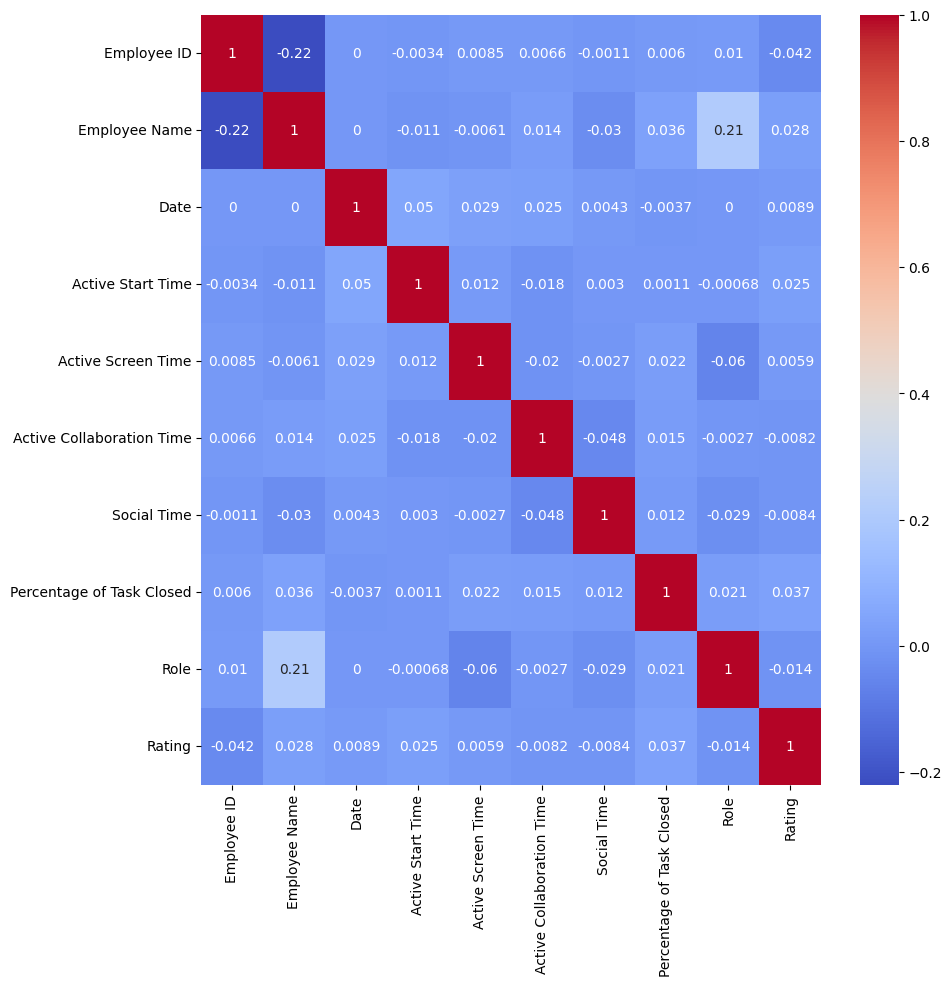

In [7]:
# use spearman correlation to find the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# create a correlation matrix
corr = df.corr(method='spearman')
# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [8]:
# do the train test split
from sklearn.model_selection import train_test_split
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = rfc.predict(X_test)

In [11]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [12]:
print(round(mae, 2))

1.24


In [13]:
import joblib
joblib.dump(rfc, 'RandomForest.joblib')

['RandomForest.joblib']

In [14]:
X_features = list( df.columns )
X_features.remove( "Rating" )

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split( df[X_features],
                                    df.Rating,
                                    test_size = 0.3,
                                    random_state = 100 )

In [26]:
import eli5.sklearn
eli5.explain_weights( 
    rfc, 
    feature_names = X_features )

Weight,Feature
0.1452 ± 0.0369,Active Screen Time
0.1408 ± 0.0366,Social Time
0.1371 ± 0.0306,Active Collaboration Time
0.1339 ± 0.0383,Date
0.1325 ± 0.0326,Active Start Time
0.1240 ± 0.0307,Percentage of Task Closed
0.0772 ± 0.0298,Employee ID
0.0649 ± 0.0271,Employee Name
0.0446 ± 0.0175,Role


In [27]:
eli5.explain_prediction( rfc,
                         X_test.iloc[0],
                         target_names = ['Outstanding', 'Good', 'Average', 'Below Average'] )

d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClass

Explanation(estimator='RandomForestClassifier()', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Outstanding', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.24945138888888882, std=None, value=1.0), FeatureWeight(feature='Percentage of Task Closed', weight=0.013502010143104308, std=None, value=76.0)], neg=[FeatureWeight(feature='Active Collaboration Time', weight=-0.05405423799947953, std=None, value=1.27), FeatureWeight(feature='Employee ID', weight=-0.04340814838795604, std=None, value=12.0), FeatureWeight(feature='Active Screen Time', weight=-0.03713195556976317, std=None, value=2.63), FeatureWeight(feature='Active Start Time', weight=-0.008107252399459508, std=None, value=92.0), FeatureWeight(feature='Date', weight=-0.004601618494357596, std=None, value=62.0), FeatureWeight(feature='Employee Name', weight=-0.00365463370970781, std=None, value=9.0), FeatureWeight(feature='Role', weight=-0.0010812006513577052, std=None, value=4.0), FeatureWeight(feature='Social Time', weight=-0.0009143518199118788, std=None, value=0.26)], pos_remaining=0, neg_remaining=0), proba=0.11, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Good', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.2464930555555555, std=None, value=1.0), FeatureWeight(feature='Active Collaboration Time', weight=0.08672677542978137, std=None, value=1.27), FeatureWeight(feature='Social Time', weight=0.0781116263904699, std=None, value=0.26), FeatureWeight(feature='Employee Name', weight=0.07698608822896062, std=None, value=9.0), FeatureWeight(feature='Employee ID', weight=0.0636319092883351, std=None, value=12.0), FeatureWeight(feature='Date', weight=0.050829561222006436, std=None, value=62.0), FeatureWeight(feature='Percentage of Task Closed', weight=0.04719392772702241, std=None, value=76.0), FeatureWeight(feature='Active Screen Time', weight=0.04638536747758013, std=None, value=2.63), FeatureWeight(feature='Role', weight=0.0189576159057708, std=None, value=4.0), FeatureWeight(feature='Active Start Time', weight=0.004684072774517669, std=None, value=92.0)], neg=[], pos_remaining=0, neg_remaining=0), proba=0.72, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Average', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.25218055555555563, std=None, value=1.0)], neg=[FeatureWeight(feature='Percentage of Task Closed', weight=-0.039383671059564807, std=None, value=76.0), FeatureWeight(feature='Active Collaboration Time', weight=-0.03345293897960446, std=None, value=1.27), FeatureWeight(feature='Social Time', weight=-0.030762058005917615, std=None, value=0.26), FeatureWeight(feature='Date', weight=-0.02025396138606553, std=None, value=62.0), FeatureWeight(feature='Employee ID', weight=-0.018

In [28]:
eli5.explain_prediction( rfc,
                         X_test.iloc[6],
                         target_names = ['Outstanding', 'Good', 'Average', 'Below Average'] )

d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClass

Explanation(estimator='RandomForestClassifier()', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Outstanding', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.24945138888888882, std=None, value=1.0), FeatureWeight(feature='Active Start Time', weight=0.013527427304371295, std=None, value=89.0)], neg=[FeatureWeight(feature='Date', weight=-0.047902236303339986, std=None, value=78.0), FeatureWeight(feature='Active Collaboration Time', weight=-0.03777005522319766, std=None, value=1.95), FeatureWeight(feature='Employee Name', weight=-0.03672892116210385, std=None, value=14.0), FeatureWeight(feature='Percentage of Task Closed', weight=-0.03154557895089918, std=None, value=63.0), FeatureWeight(feature='Social Time', weight=-0.025079013167887885, std=None, value=0.93), FeatureWeight(feature='Active Screen Time', weight=-0.021287589086773195, std=None, value=3.75), FeatureWeight(feature='Employee ID', weight=-0.017327473389167618, std=None, value=13.0), FeatureWeight(feature='Role', weight=-0.005337948909890791, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.04, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Good', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.2464930555555555, std=None, value=1.0), FeatureWeight(feature='Active Collaboration Time', weight=0.013848377102182499, std=None, value=1.95)], neg=[FeatureWeight(feature='Active Start Time', weight=-0.06633065858819502, std=None, value=89.0), FeatureWeight(feature='Active Screen Time', weight=-0.036407402025252986, std=None, value=3.75), FeatureWeight(feature='Role', weight=-0.02685461704013186, std=None, value=1.0), FeatureWeight(feature='Percentage of Task Closed', weight=-0.026821561362143136, std=None, value=63.0), FeatureWeight(feature='Date', weight=-0.02356362030904276, std=None, value=78.0), FeatureWeight(feature='Employee Name', weight=-0.021021906375927647, std=None, value=14.0), FeatureWeight(feature='Social Time', weight=-0.009206102449624665, std=None, value=0.93), FeatureWeight(feature='Employee ID', weight=-0.00013556450741997352, std=None, value=13.0)], pos_remaining=0, neg_remaining=0), proba=0.05, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Average', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.25218055555555563, std=None, value=1.0), FeatureWeight(feature='Employee Name', weight=0.048127562913400194, std=None, value=14.0), FeatureWeight(feature='Role', weight=0.021755615565441446, std=None, value=1.0), FeatureWeight(feature='Percentage of Task Closed', weight=0.0002877739775060348, std=None, value=63.0)], neg=[FeatureWeight(feature='Social Time', weight=-0.045268843818546296, std=None, value=0.93), FeatureWeight(feature='Employee ID', weight=-0.

In [29]:
eli5.explain_prediction( rfc,
                         X_test.iloc[5],
                         target_names = ['Outstanding', 'Good', 'Average', 'Below Average'] )

d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClass

Explanation(estimator='RandomForestClassifier()', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Outstanding', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.24945138888888882, std=None, value=1.0), FeatureWeight(feature='Active Start Time', weight=0.004844920881940463, std=None, value=88.0)], neg=[FeatureWeight(feature='Social Time', weight=-0.045945761766011575, std=None, value=1.82), FeatureWeight(feature='Percentage of Task Closed', weight=-0.033342603010484, std=None, value=61.0), FeatureWeight(feature='Date', weight=-0.02865389560516351, std=None, value=46.0), FeatureWeight(feature='Active Screen Time', weight=-0.022175954173034404, std=None, value=3.2), FeatureWeight(feature='Employee ID', weight=-0.0171548656136484, std=None, value=10.0), FeatureWeight(feature='Active Collaboration Time', weight=-0.006813519983931138, std=None, value=1.52), FeatureWeight(feature='Role', weight=-0.005328811271080073, std=None, value=2.0), FeatureWeight(feature='Employee Name', weight=-0.0048808983474762195, std=None, value=7.0)], pos_remaining=0, neg_remaining=0), proba=0.09, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Good', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.2464930555555555, std=None, value=1.0), FeatureWeight(feature='Employee ID', weight=0.023521291525814544, std=None, value=10.0), FeatureWeight(feature='Employee Name', weight=0.006109885559534779, std=None, value=7.0)], neg=[FeatureWeight(feature='Percentage of Task Closed', weight=-0.05166776237777655, std=None, value=61.0), FeatureWeight(feature='Active Collaboration Time', weight=-0.039943789643914866, std=None, value=1.52), FeatureWeight(feature='Social Time', weight=-0.0364114033449591, std=None, value=1.82), FeatureWeight(feature='Active Start Time', weight=-0.019270255896900026, std=None, value=88.0), FeatureWeight(feature='Date', weight=-0.014509321502621679, std=None, value=46.0), FeatureWeight(feature='Active Screen Time', weight=-0.013632325912237151, std=None, value=3.2), FeatureWeight(feature='Role', weight=-0.0006893739624955081, std=None, value=2.0)], pos_remaining=0, neg_remaining=0), proba=0.1, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Average', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.25218055555555563, std=None, value=1.0), FeatureWeight(feature='Percentage of Task Closed', weight=0.023320654106856215, std=None, value=61.0), FeatureWeight(feature='Role', weight=0.00956480600027794, std=None, value=2.0)], neg=[FeatureWeight(feature='Employee ID', weight=-0.04220730364635755, std=None, value=10.0), FeatureWeight(feature='Social Time', weight=-0.032011984451336344, std=None, value=1.82), FeatureWeight(feature='Active Start Time', weight=-0.0256128

In [30]:
eli5.explain_prediction( rfc,
                         X_test.iloc[10],
                         target_names = ['Outstanding', 'Good', 'Average', 'Below Average'] )

d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\envs\IntelAPI\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClass

Explanation(estimator='RandomForestClassifier()', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Outstanding', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.24945138888888882, std=None, value=1.0), FeatureWeight(feature='Active Start Time', weight=0.013256874610993096, std=None, value=46.0), FeatureWeight(feature='Date', weight=0.007488365942831564, std=None, value=8.0), FeatureWeight(feature='Social Time', weight=0.0062987525007537504, std=None, value=1.58)], neg=[FeatureWeight(feature='Active Collaboration Time', weight=-0.03743670778116228, std=None, value=1.23), FeatureWeight(feature='Role', weight=-0.03035377248177148, std=None, value=4.0), FeatureWeight(feature='Active Screen Time', weight=-0.027075262242915676, std=None, value=1.1899999999999997), FeatureWeight(feature='Percentage of Task Closed', weight=-0.023088197797260138, std=None, value=97.0), FeatureWeight(feature='Employee ID', weight=-0.021033030239989748, std=None, value=11.0), FeatureWeight(feature='Employee Name', weight=-0.007508411400367972, std=None, value=8.0)], pos_remaining=0, neg_remaining=0), proba=0.13, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Good', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.2464930555555555, std=None, value=1.0), FeatureWeight(feature='Active Collaboration Time', weight=0.13130289136191128, std=None, value=1.23), FeatureWeight(feature='Active Screen Time', weight=0.0638138592099771, std=None, value=1.1899999999999997), FeatureWeight(feature='Social Time', weight=0.061223607206027965, std=None, value=1.58), FeatureWeight(feature='Employee ID', weight=0.05430833938377292, std=None, value=11.0), FeatureWeight(feature='Active Start Time', weight=0.052549894946820955, std=None, value=46.0), FeatureWeight(feature='Role', weight=0.03845195934795336, std=None, value=4.0), FeatureWeight(feature='Date', weight=0.03764890397865544, std=None, value=8.0), FeatureWeight(feature='Employee Name', weight=0.03330058419813287, std=None, value=8.0), FeatureWeight(feature='Percentage of Task Closed', weight=0.030906904811192477, std=None, value=97.0)], neg=[], pos_remaining=0, neg_remaining=0), proba=0.75, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Average', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.25218055555555563, std=None, value=1.0), FeatureWeight(feature='Active Screen Time', weight=0.006503533778237456, std=None, value=1.1899999999999997)], neg=[FeatureWeight(feature='Active Collaboration Time', weight=-0.08773486829121387, std=None, value=1.23), FeatureWeight(feature='Active Start Time', weight=-0.036486076974340524, std=None, value=46.0), FeatureWeight(feature='Percentage of Task Closed', weight=-0.03504117182171133, std=None, va